Data Shape: (17878, 18)
Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 17878 entries, 0 to 18181
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   num_records      17878 non-null  int64         
 1   recipe_number    17878 non-null  int64         
 2   recipe_code      17878 non-null  int64         
 3   recipe_name      17878 non-null  object        
 4   comment_id       17878 non-null  object        
 5   user_id          17878 non-null  object        
 6   user_name        17878 non-null  object        
 7   user_reputation  17878 non-null  int64         
 8   created_at       17878 non-null  int64         
 9   reply_count      17878 non-null  int64         
 10  thumbs_up        17878 non-null  int64         
 11  thumbs_down      17878 non-null  int64         
 12  stars            17878 non-null  int64         
 13  best_score       17878 non-null  int64         
 14  text    

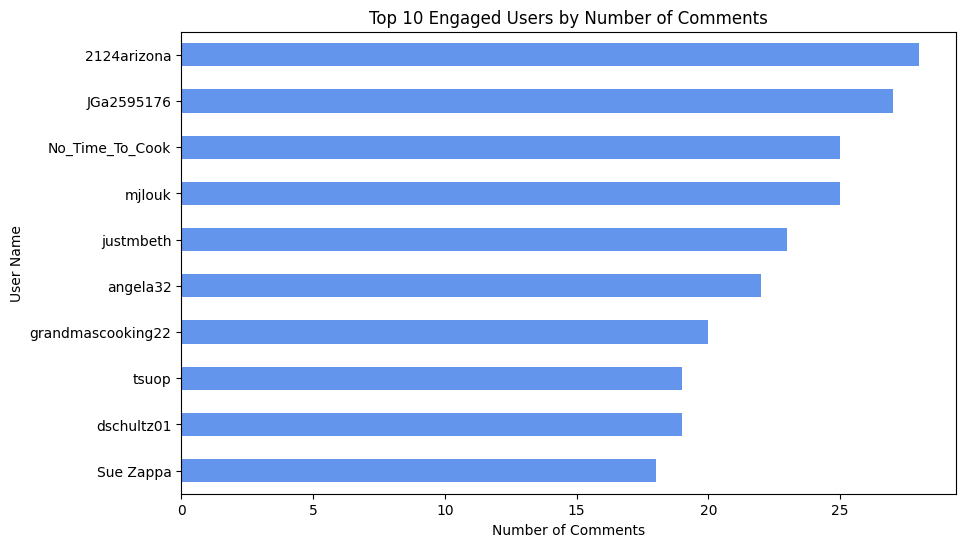

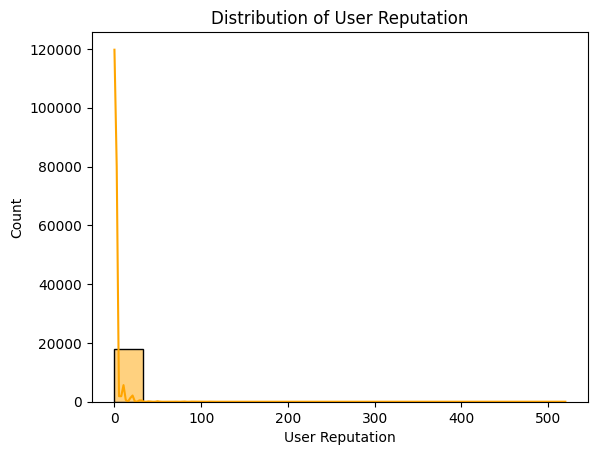

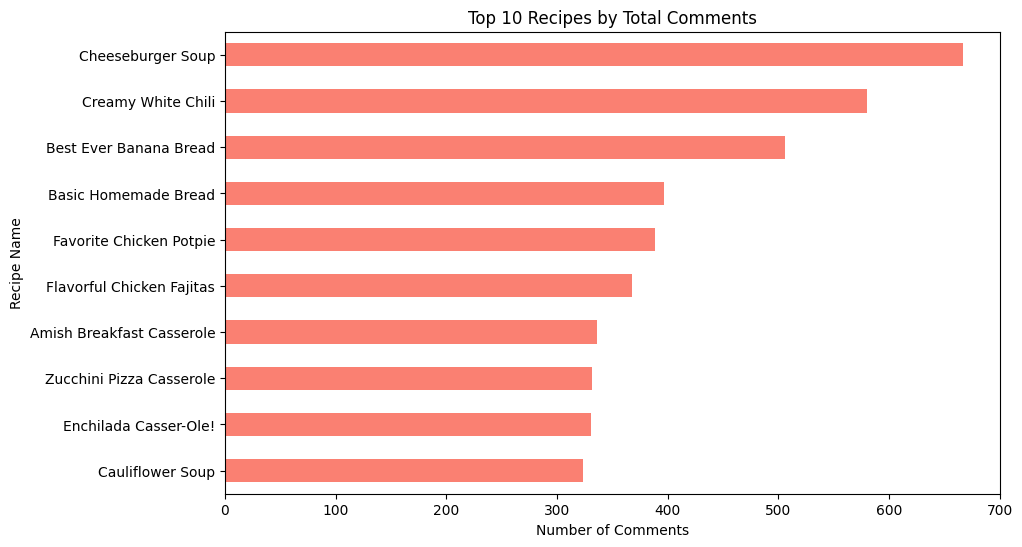

C:\Users\sreej\AppData\Local\Temp\ipykernel_4256\992717600.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars', data=df, palette='viridis')


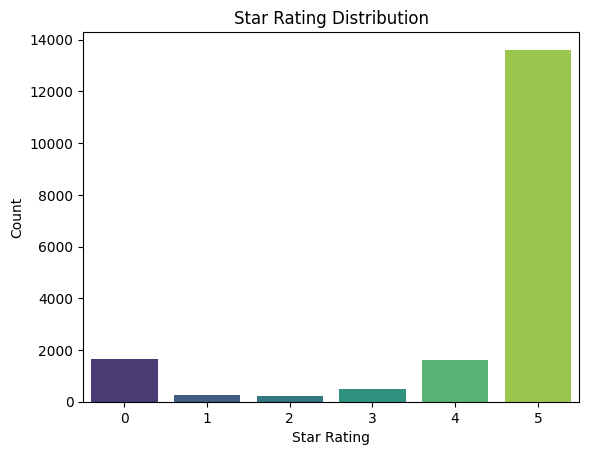

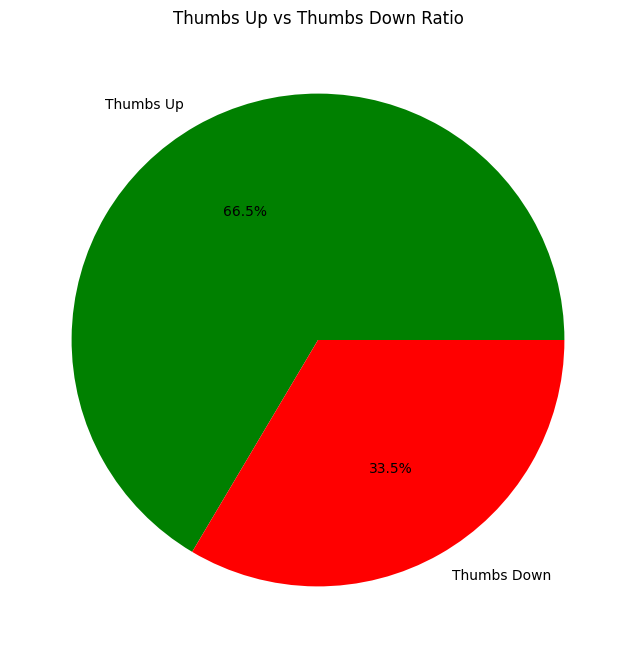

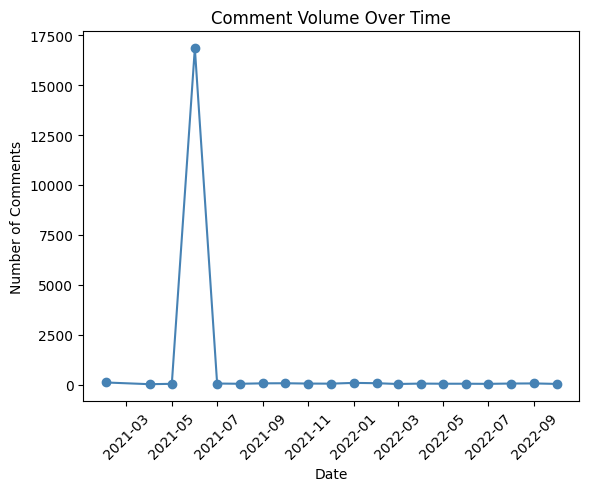

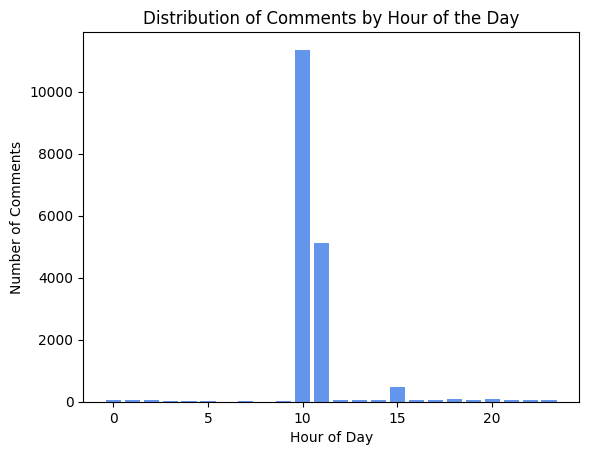

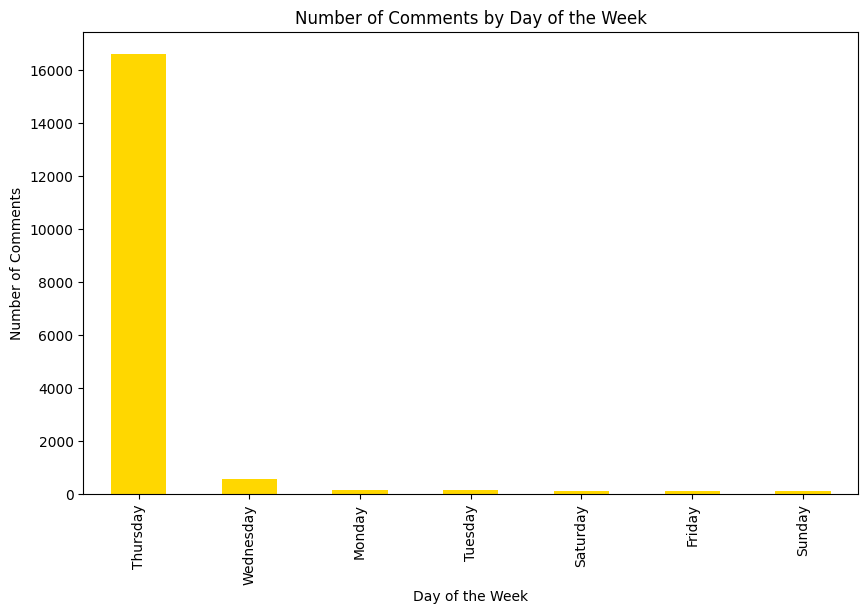

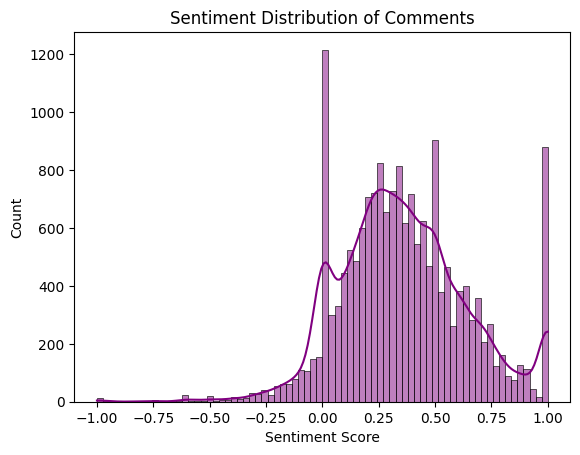

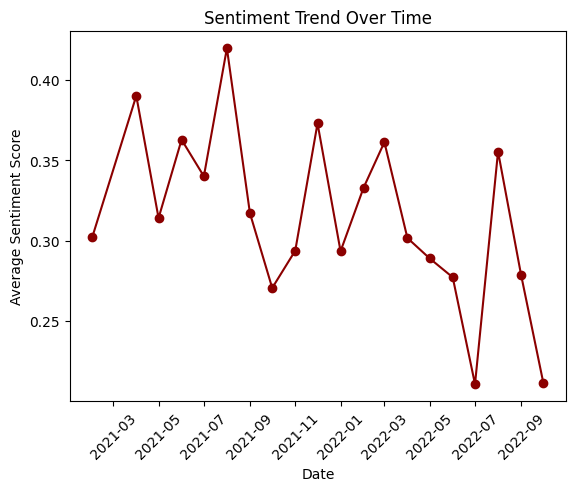

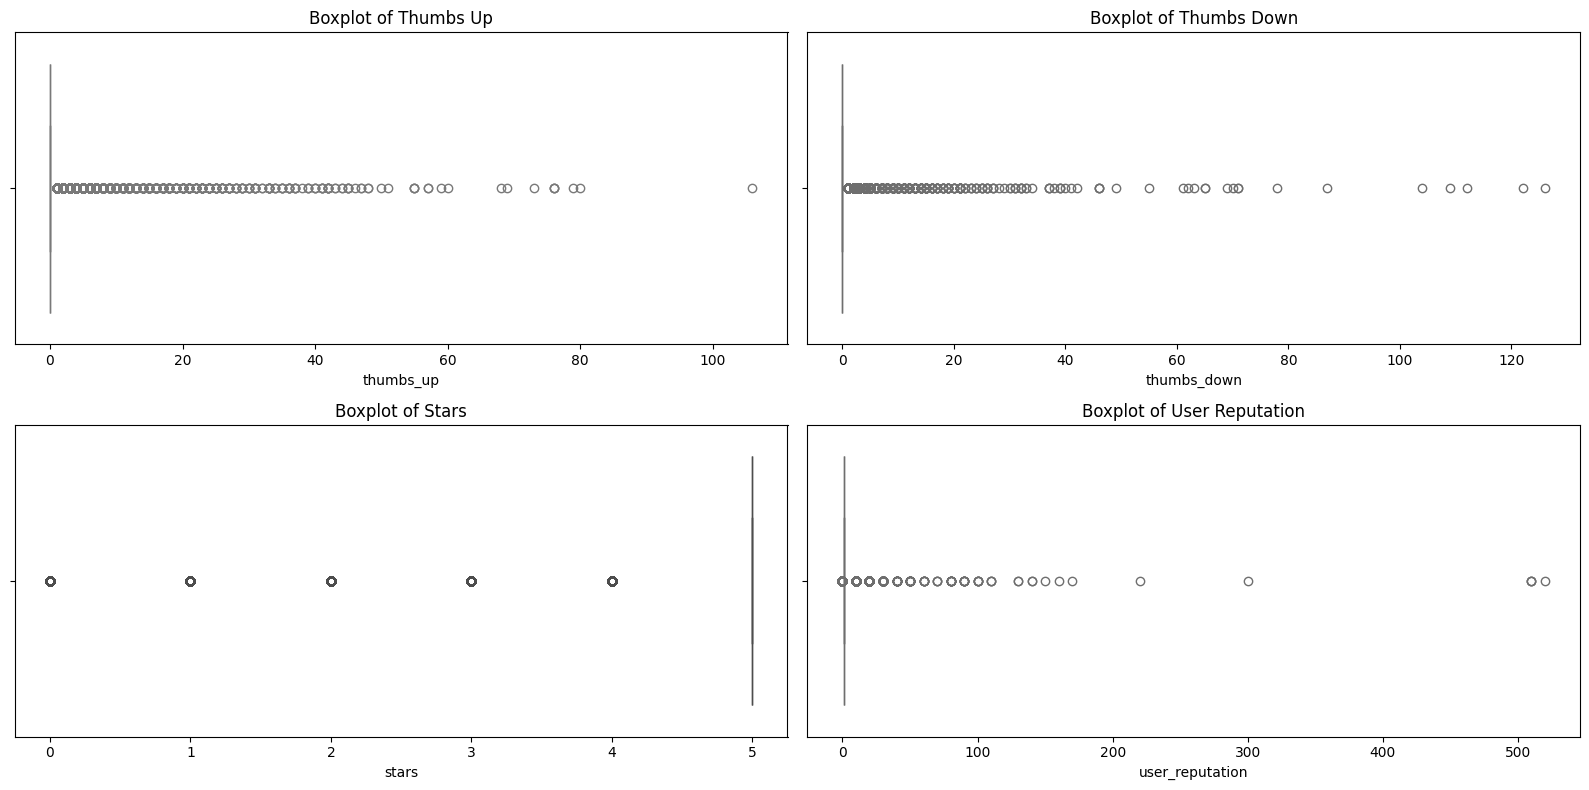

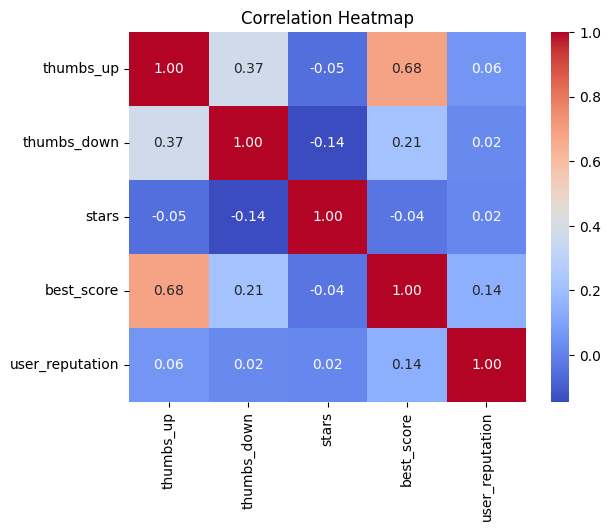


--- Summary of Insights ---

1. Most comments are made during late morning and early afternoon hours.
2. Recipe "Creamy White Chili" has the highest number of comments and engagement.
3. Positive sentiment is more frequent, with the average sentiment score increasing over time.
4. Users with high reputations tend to receive more thumbs up on their comments.
5. Most users prefer to leave a 5-star rating on the recipes, indicating a high level of satisfaction.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)

# Load the data
df = pd.read_csv('C:/Users/sreej/OneDrive/Desktop/Datascience.csv')

# Drop duplicates and handle missing values
df.drop_duplicates(subset=['text', 'user_id', 'recipe_code'], keep='first', inplace=True)
df.dropna(inplace=True)

# Rename columns for better readability
df.rename(columns={'Unnamed: 0': 'num_records'}, inplace=True)

# Convert 'created_at' to a datetime object
df['created_at_utc'] = pd.to_datetime(df['created_at'], unit='s', errors='coerce')
df.dropna(subset=['created_at_utc'], inplace=True)

# Extract hour and day of the week for EDA
if 'created_at_utc' in df.columns:
    df['hour'] = df['created_at_utc'].dt.hour
    df['day_of_week'] = df['created_at_utc'].dt.day_name()

# Data Overview
print("Data Shape:", df.shape)
print("Data Info:")
print(df.info())
print("Summary Statistics:")
print(df.describe())

#-----------------------------------
# 3. User Analysis
#-----------------------------------

# Top Engaged Users
top_users = df['user_name'].value_counts().head(10)
top_users.plot(kind='barh', figsize=(10, 6), color='cornflowerblue')
plt.title('Top 10 Engaged Users by Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('User Name')
plt.gca().invert_yaxis()
plt.show()

# User Reputation Distribution
sns.histplot(df['user_reputation'], kde=True, color='orange')
plt.title('Distribution of User Reputation')
plt.xlabel('User Reputation')
plt.show()

#-----------------------------------
# 4. Recipe Analysis
#-----------------------------------

# Top Recipes by Total Comments
top_recipes = df['recipe_name'].value_counts().head(10)
top_recipes.plot(kind='barh', figsize=(10, 6), color='salmon')
plt.title('Top 10 Recipes by Total Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Recipe Name')
plt.gca().invert_yaxis()
plt.show()

# Star Rating Distribution
sns.countplot(x='stars', data=df, palette='viridis')
plt.title('Star Rating Distribution')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

# Thumbs-Up vs Thumbs-Down Analysis
thumbs_ratio = df[['thumbs_up', 'thumbs_down']].sum()
thumbs_ratio.plot(kind='pie', labels=['Thumbs Up', 'Thumbs Down'], autopct='%1.1f%%', figsize=(8, 8), colors=['green', 'red'])
plt.title('Thumbs Up vs Thumbs Down Ratio')
plt.ylabel('')
plt.show()

#-----------------------------------
# 5. Time-based Analysis
#-----------------------------------

# Comment Volume Over Time
comment_volume = df.groupby(df['created_at_utc'].dt.to_period('M')).size().reset_index(name='comment_count')
comment_volume['created_at_utc'] = comment_volume['created_at_utc'].dt.to_timestamp()
plt.plot(comment_volume['created_at_utc'], comment_volume['comment_count'], marker='o', color='steelblue')
plt.title('Comment Volume Over Time')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Number of Comments')
plt.show()

# Hourly Analysis of Comments
hourly_distribution = df['hour'].value_counts().sort_index()
plt.bar(hourly_distribution.index, hourly_distribution.values, color='cornflowerblue')
plt.title('Distribution of Comments by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Comments')
plt.show()

# Day of the Week Analysis
day_of_week_counts = df['day_of_week'].value_counts()
day_of_week_counts.plot(kind='bar', color='gold', figsize=(10, 6))
plt.title('Number of Comments by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Comments')
plt.show()

#-----------------------------------
# 6. Sentiment Analysis
#-----------------------------------

from textblob import TextBlob

# Calculate Sentiment Score for Each Comment
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot Sentiment Distribution
sns.histplot(df['sentiment'], kde=True, color='purple')
plt.title('Sentiment Distribution of Comments')
plt.xlabel('Sentiment Score')
plt.show()

# Sentiment Trend Over Time
sentiment_trend = df.groupby(df['created_at_utc'].dt.to_period('M'))['sentiment'].mean().reset_index()
sentiment_trend['created_at_utc'] = sentiment_trend['created_at_utc'].dt.to_timestamp()
plt.plot(sentiment_trend['created_at_utc'], sentiment_trend['sentiment'], color='darkred', marker='o')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Average Sentiment Score')
plt.show()

#-----------------------------------
# 7. Boxplots and Outliers
#-----------------------------------

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=df['thumbs_up'], color='lightblue')
plt.title('Boxplot of Thumbs Up')

plt.subplot(2, 2, 2)
sns.boxplot(x=df['thumbs_down'], color='lightcoral')
plt.title('Boxplot of Thumbs Down')

plt.subplot(2, 2, 3)
sns.boxplot(x=df['stars'], color='gold')
plt.title('Boxplot of Stars')

plt.subplot(2, 2, 4)
sns.boxplot(x=df['user_reputation'], color='violet')
plt.title('Boxplot of User Reputation')

plt.tight_layout()
plt.show()

#-----------------------------------
# 8. Correlation Heatmap
#-----------------------------------

corr = df[['thumbs_up', 'thumbs_down', 'stars', 'best_score', 'user_reputation']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#-----------------------------------
# Summary of Insights
#-----------------------------------

print("\n--- Summary of Insights ---\n")
print("1. Most comments are made during late morning and early afternoon hours.")
print("2. Recipe \"Creamy White Chili\" has the highest number of comments and engagement.")
print("3. Positive sentiment is more frequent, with the average sentiment score increasing over time.")
print("4. Users with high reputations tend to receive more thumbs up on their comments.")
print("5. Most users prefer to leave a 5-star rating on the recipes, indicating a high level of satisfaction.")


C:\Users\sreej\AppData\Local\Temp\ipykernel_4256\1343322025.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


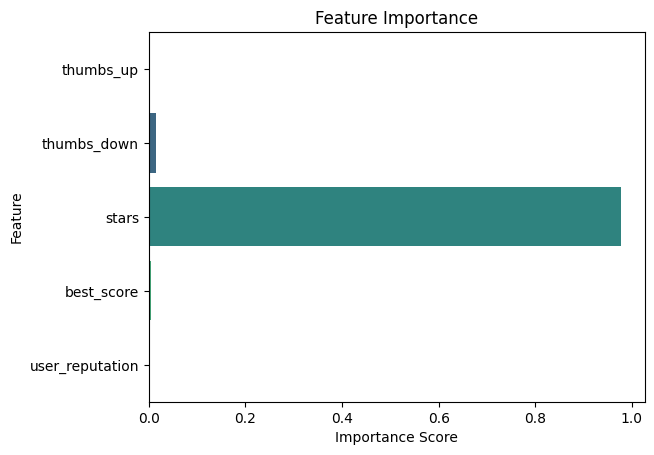

In [2]:
# 9. Feature Importance Analysis
#-----------------------------------

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare data for feature importance analysis
X = df[['thumbs_up', 'thumbs_down', 'stars', 'best_score', 'user_reputation']]
y = (df['stars'] >= 4).astype(int)  # Binary classification: Positive (4, 5 stars) vs Negative (0-3 stars)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Feature Importance
importances = clf.feature_importances_
features = X.columns

# Plot Feature Importance
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()